# Kollokasjoner for nøkkelord

In [1]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
import dhlab.graph_networkx_louvain as gnl
from dhlab.module_update import update, css, code_toggle

In [2]:
css()

In [3]:
def categorize(list_of_words):
    proprium = [x for x in list_of_words if x[0].upper() == x[0]]
    other = [x for x in list_of_words if not x in proprium]

    return {'propr':proprium,
           'other': other }

def select_form(w):
    fs = [x.split()[0] for x in nb.word_form(w)]
    if 'verb' in fs:
        res = 'verb'
    elif 'subst' in fs:
        res = 'subst'
    elif len(fs) > 0:
        res = fs[0]
    else:
        res = 'unknown'
    return res

def sort_word_forms(words):
    res = {select_form(w):w for w in words}
    return res

def character_words(Character_name, number_of_words=50):
    res = {w:select_form(w) for w in categorize(list(nb.frame_sort(nb.frame(coll_matrix[Character_name]/tot['tot'], 'association')).head(number_of_words).index))['other']}
    result = {cat:[w for w in res if res[w] == cat] for cat in res.values()}
    return result

def mdprint(forskjell, cutoff=5):
    categories = categorize(forskjell[forskjell > cutoff].dropna().index)
    forms = {w:select_form(w) for w in categories['other']}
    Grouping = {cat:[word for word in forms if forms[word] == cat] for cat in forms.values()}
    navn = "## Benevnelser \n"
    navn += "<span style='font-size:150%'>{stuff}</span>".format(stuff= ', '.join(categories['propr']))
    pos = ""
    for cat in Grouping:
        pos += "## " + cat + "\n"
        pos += "<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(Grouping[cat]) ) + "\n"
    mu.printmd(navn)
    mu.printmd(pos)
    return

In [4]:
import pandas as pd

In [5]:
import ast

In [6]:
#colls_before = pd.read_json('demokrati_before.json')

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

In [9]:
cliques = lambda G: [list(x) for  x in list(gnl.make_cliques_from_graph(G.to_undirected())[1].values())]
    

## Definer nøkkelordet

noteboken blir kjørt flere ganger, en notebook for hvert nøkkelord, *influensa*, *helse*

In [10]:
reference = pd.read_json('avis_agg_sample_20.json')

In [11]:
keyword = 'kjærlighet'

In [12]:
filename = 'collocation_' + keyword + ".csv"

## Grafstruktur topos

In [13]:
keyword_graph = nb.make_graph(keyword, cutoff=16)

In [14]:
comm = gnl.community_dict(keyword_graph)

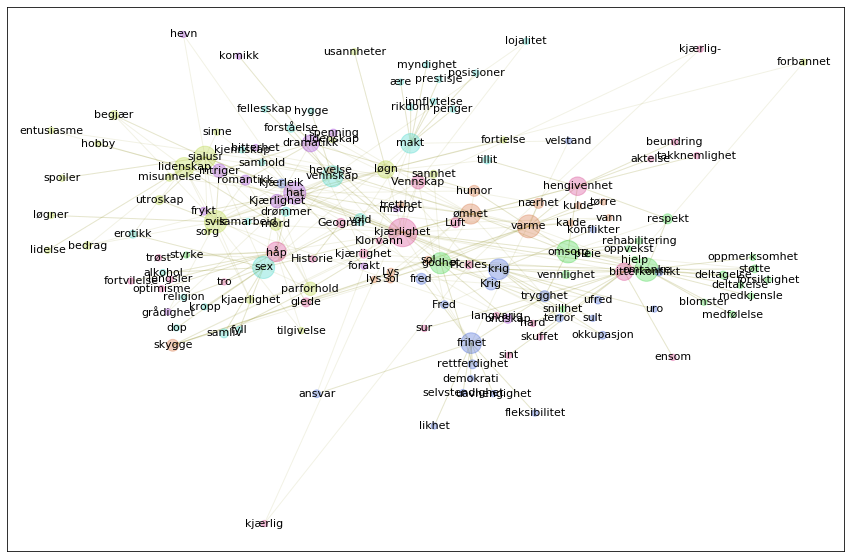

In [15]:
gnl.show_graph(keyword_graph, spread=0.8, fontsize=11)

In [16]:
keyword_cliques = cliques(keyword_graph)

# Grafens klikkstruktur (klikk = clique)

Klikkstrukturen er fin for å se overlapp og forskjellige kontekster hvor nøkkelordet forekommer. 

In [17]:
for i in keyword_cliques:
    mu.printmd("<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ' ,'.join(i)))

<span style='font-size:1.1em'>varme ,nærhet ,hevn ,hengivenhet ,trygghet ,parforhold ,Vennskap ,vennskap ,sinne ,sorg ,deltagelse ,respekt ,bedrag ,løgn ,svik ,omsorg ,Kjærlighet ,hat ,godhet ,utroskap ,intriger ,kjaerlighet ,sjalusi ,begjær ,makt ,vennlighet ,omtanke ,mord ,humor ,sex ,misunnelse ,samliv ,romantikk ,ømhet ,vold ,støtte ,lidenskap ,kjærlighet ,drømmer ,Krig</span>

<span style='font-size:1.1em'>begjær ,svik ,Kjærlighet ,lidenskap ,intriger ,vennskap ,kjærlighet ,sjalusi ,mord</span>

<span style='font-size:1.1em'>varme ,hengivenhet ,trygghet ,omsorg ,godhet ,ømhet ,kjærlighet ,omtanke</span>

<span style='font-size:1.1em'>varme ,hengivenhet ,godhet ,omsorg ,ømhet ,kjærlighet ,omtanke</span>

<span style='font-size:1.1em'>varme ,kjærlighet ,omtanke ,godhet ,omsorg ,ømhet</span>

# Topoi fra grafen

Der klikkstrukturen kombinerer færre element, er alle nodene i grafen med og definerer et topos.

In [18]:
pos=""
for x in comm:
    pos += "### " + x + "\n"
    pos += "<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(comm[x]) ) + "\n"
mu.printmd(pos)

### svik-sjalusi
<span style='font-size:1.1em'>svik, sjalusi, lidenskap, løgn, parforhold, mord, utroskap, begjær, bedrag, kjaerlighet, misunnelse, sannhet, løgner, sorg, sinne, lidelse, fortielse, usannheter, Lidenskap, entusiasme, tilgivelse, spoiler, forbannet, hobby</span>
### omtanke-omsorg
<span style='font-size:1.1em'>omtanke, omsorg, godhet, respekt, deltagelse, vennlighet, støtte, medkjensle, hjelp, forsiktighet, pleie, oppvekst, blomster, medfølelse, deltakelse, styrke, snillhet, oppmerksomhet, rehabilitering</span>
### sex-vennskap
<span style='font-size:1.1em'>sex, vennskap, makt, vold, samliv, drømmer, tillit, erotikk, forståelse, alkohol, kropp, samarbeid, prestisje, ære, posisjoner, myndighet, religion, dop, lojalitet, samhold, fellesskap, innflytelse, penger, hygge, fyll, rikdom, kjennskap</span>
### frihet-krig
<span style='font-size:1.1em'>frihet, krig, Krig, trygghet, fred, rettferdighet, kjærleik, konflikt, ansvar, okkupasjon, terror, Fred, ufred, velstand, konflikter, likhet, fleksibilitet, uro, selvstendighet, demokrati, sult, uavhengighet</span>
### hat-dramatikk
<span style='font-size:1.1em'>hat, dramatikk, Kjærlighet, intriger, romantikk, ondskap, frykt, spenning, hevn, bitterhet, grådighet, komikk, mistro, forakt</span>
### kjærlighet-håp
<span style='font-size:1.1em'>kjærlighet, håp, hengivenhet, bitter, Vennskap, Luft, Geografi, kjæriighet, glede, Pickles, optimisme, lengsler, fortvilelse, trøst, aktelse, skuffet, kjærlig, tro, kjærlig-, beundring, sur, Historie, hard, takknemlighet, Klorvann, langvarig, ensom, sint</span>
### varme-ømhet
<span style='font-size:1.1em'>varme, ømhet, skygge, humor, nærhet, Lys, sol, Sol, tørre, vann, kalde, hevelse, lys, tretthet, kulde</span>


# Assosiasjoner fra kollokasjonene

<span style="font-size:150%">nb.collocation(keyword, yearfrom=1950, yearto=2000, before=10, after=10, corpus='avis')</span>


Her ser vi først på referansekorpuset, og validerer det. Det er gruppert på tiår.

In [80]:
barchart = lambda word, df: df.loc[word].plot(kind='bar', rot=30, figsize=(10,5),title=word);

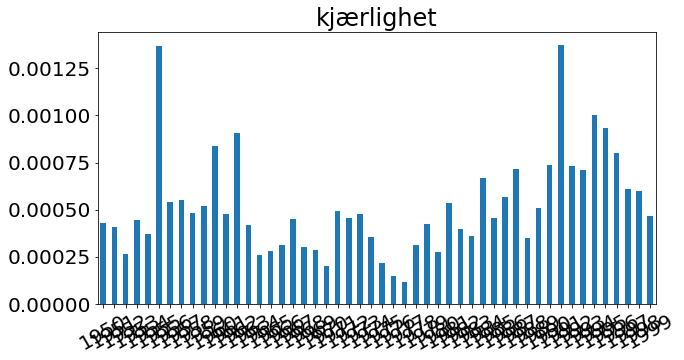

In [81]:
barchart(keyword, reference);

In [21]:
from time import time

collocations = dict()
step = 1

for i in range(1950, 2000):
    print(i)
    t0 = time()
    try:
        collocations[i] = nb.collocation(keyword, yearfrom=i, yearto=i+step, before = 10, after = 10, corpus = 'avis')
    except:
        try:
            collocations[i] = nb.collocation(keyword, yearfrom=i, yearto=i+step, before = 10, after = 10, corpus = 'avis')
        except:
            print("gir opp", i)
    print((time() - t0)/60, "minutter")

1950
0.859760069847107 minutter
1951
0.5032399336496989 minutter
1952
0.5780080477396647 minutter
1953
0.6226876497268676 minutter
1954
0.7674413283665975 minutter
1955
0.6471016963322958 minutter
1956
0.6650381127993266 minutter
1957
0.6615432659784953 minutter
1958
0.6664745092391968 minutter
1959
0.7273555835088094 minutter
1960
0.7583710710207622 minutter
1961
1.0447828729947408 minutter
1962
0.9876796841621399 minutter
1963
1.0029287338256836 minutter
1964
0.746472446123759 minutter
1965
0.6932956139246623 minutter
1966
0.7431402047475179 minutter
1967
0.5998891592025757 minutter
1968
0.6302227099736532 minutter
1969
0.5520831783612569 minutter
1970
0.6893128236134847 minutter
1971
0.5739357789357503 minutter
1972
0.5182203372319539 minutter
1973
0.5988430857658387 minutter
1974
0.6111564437548319 minutter
1975
0.5514294624328613 minutter
1976
0.6181490341822307 minutter
1977
0.5250891009966533 minutter
1978
0.5666862448056539 minutter
1979
0.5627348899841309 minutter
1980
0.67402

In [22]:
colls = nb.frame(collocations)

In [23]:
colls = pd.concat([nb.frame(collocations[i], i) for i in collocations], axis=1).fillna(0)

In [24]:
def group_frames(df, bins=10, mode='rel'):
    agg = pd.DataFrame()
    step = 10
    for i in range(0, len(df.columns), step):
        agg[df.columns[i]] = df[df.columns[i:i+step]].sum(axis=1)
    return agg

In [25]:
agg = group_frames(colls)

In [26]:
agg.to_csv('agg_' + filename)

In [27]:
nb.normalize_corpus_dataframe(agg)

True

In [28]:
ref = group_frames(reference)
nb.normalize_corpus_dataframe(ref)

True


# Opptelling

# Sammenligner med en referanse


In [29]:
ref.sort_values(by=ref.columns[2], ascending=False)[:10].style.background_gradient()

,1950,1960,1970,1980,1990
.,0.0663397,0.0632207,0.0621348,0.0647454,0.067428
",",0.0403233,0.0416929,0.0356677,0.0371536,0.0367841
i,0.0247726,0.0250452,0.0241426,0.0222206,0.0206715
og,0.0210996,0.0213896,0.0187403,0.0186412,0.0163648
til,0.0116118,0.0113418,0.0108464,0.0103711,0.00896154
er,0.0115398,0.010944,0.0107374,0.0107173,0.0100185
-,0.00541194,0.00706152,0.00962028,0.0122338,0.0178025
som,0.0101848,0.0101861,0.00957867,0.00899728,0.00766517
det,0.0113158,0.0105602,0.00956937,0.00859934,0.00707421
for,0.00928578,0.00940446,0.00923043,0.00847701,0.00735523


In [30]:
agg.sort_values(by=agg.columns[2], ascending=False)[:10].style.background_gradient()

,1950,1960,1970,1980,1990
.,0.057851,0.0577134,0.0585838,0.0665423,0.0860731
",",0.045709,0.0465693,0.0454853,0.0454642,0.0406717
og,0.0391839,0.042889,0.0419384,0.0462956,0.0418074
i,0.0198798,0.0197126,0.0194172,0.0193255,0.0207856
er,0.0170227,0.0177441,0.0182387,0.0162092,0.0128561
til,0.0184523,0.017966,0.0171488,0.0135041,0.0106074
som,0.0154325,0.0149897,0.0155481,0.0133846,0.0100349
en,0.0129486,0.0129369,0.0126797,0.0128086,0.0102777
av,0.011109,0.0115794,0.0116784,0.0105009,0.00799182
om,0.00918496,0.00973312,0.0116562,0.0164102,0.0155971


In [31]:
pmi = pd.DataFrame()
exp = 1.1
for i in agg:
    pmi[i] = agg[i]**exp/(pd.concat([agg[i], ref[i]],axis=1).sum(axis=1))

In [32]:
nb.normalize_corpus_dataframe(pmi)

True

<br>
<br>
<br>
<br>


# De 15 beste for passende kolonne

In [33]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(15).fillna(0).style.background_gradient(axis=0)

,1950,1960,1970,1980,1990
Guds,3.3946e-05,3.3686e-05,4.22751e-05,3.07981e-05,2.02621e-05
kjærlighet,3.36444e-05,3.31505e-05,4.13244e-05,3.19713e-05,2.13636e-05
Gud,3.20373e-05,3.16298e-05,4.01558e-05,2.92896e-05,1.9272e-05
omsorg,3.19046e-05,3.17417e-05,3.95575e-05,3.09277e-05,2.10451e-05
hans,3.18412e-05,3.04958e-05,3.72184e-05,2.72816e-05,1.76886e-05
sin,3.08774e-05,2.93867e-05,3.68953e-05,2.72967e-05,1.92311e-05
hat,3.01726e-05,2.95882e-05,3.6824e-05,3.1958e-05,2.10891e-05
hennes,3.00922e-05,2.89595e-05,3.52723e-05,2.65403e-05,1.82964e-05
Kristi,2.96459e-05,2.8193e-05,3.5056e-05,2.42076e-05,1.57441e-05
godhet,2.93508e-05,2.85964e-05,3.51453e-05,2.69942e-05,1.84447e-05


In [34]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(15).fillna(0).style.background_gradient(axis=0)

,1950,1960,1970,1980,1990
Guds,3.3946e-05,3.3686e-05,4.22751e-05,3.07981e-05,2.02621e-05
kjærlighet,3.36444e-05,3.31505e-05,4.13244e-05,3.19713e-05,2.13636e-05
Gud,3.20373e-05,3.16298e-05,4.01558e-05,2.92896e-05,1.9272e-05
omsorg,3.19046e-05,3.17417e-05,3.95575e-05,3.09277e-05,2.10451e-05
hans,3.18412e-05,3.04958e-05,3.72184e-05,2.72816e-05,1.76886e-05
sin,3.08774e-05,2.93867e-05,3.68953e-05,2.72967e-05,1.92311e-05
hat,3.01726e-05,2.95882e-05,3.6824e-05,3.1958e-05,2.10891e-05
hennes,3.00922e-05,2.89595e-05,3.52723e-05,2.65403e-05,1.82964e-05
Kristi,2.96459e-05,2.8193e-05,3.5056e-05,2.42076e-05,1.57441e-05
godhet,2.93508e-05,2.85964e-05,3.51453e-05,2.69942e-05,1.84447e-05


In [35]:
pmi.sort_values(by=pmi.columns[1], ascending=False).head(70).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
Guds,3.3946e-05,3.3686e-05,4.22751e-05,3.07981e-05,2.02621e-05
kjærlighet,3.36444e-05,3.31505e-05,4.13244e-05,3.19713e-05,2.13636e-05
omsorg,3.19046e-05,3.17417e-05,3.95575e-05,3.09277e-05,2.10451e-05
Gud,3.20373e-05,3.16298e-05,4.01558e-05,2.92896e-05,1.9272e-05
hans,3.18412e-05,3.04958e-05,3.72184e-05,2.72816e-05,1.76886e-05
hat,3.01726e-05,2.95882e-05,3.6824e-05,3.1958e-05,2.10891e-05
og,2.93004e-05,2.94341e-05,3.78314e-05,3.11326e-05,2.18134e-05
sin,3.08774e-05,2.93867e-05,3.68953e-05,2.72967e-05,1.92311e-05
Jesus,2.91839e-05,2.91364e-05,3.67895e-05,2.70443e-05,1.78733e-05
kjærligheten,2.89529e-05,2.9087e-05,3.64486e-05,2.75851e-05,1.86165e-05


In [36]:
pmi.sort_values(by=pmi.columns[2], ascending=False).head(45).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
Guds,3.3946e-05,3.3686e-05,4.22751e-05,3.07981e-05,2.02621e-05
kjærlighet,3.36444e-05,3.31505e-05,4.13244e-05,3.19713e-05,2.13636e-05
Gud,3.20373e-05,3.16298e-05,4.01558e-05,2.92896e-05,1.9272e-05
omsorg,3.19046e-05,3.17417e-05,3.95575e-05,3.09277e-05,2.10451e-05
og,2.93004e-05,2.94341e-05,3.78314e-05,3.11326e-05,2.18134e-05
hans,3.18412e-05,3.04958e-05,3.72184e-05,2.72816e-05,1.76886e-05
sin,3.08774e-05,2.93867e-05,3.68953e-05,2.72967e-05,1.92311e-05
hat,3.01726e-05,2.95882e-05,3.6824e-05,3.1958e-05,2.10891e-05
Jesus,2.91839e-05,2.91364e-05,3.67895e-05,2.70443e-05,1.78733e-05
kjærligheten,2.89529e-05,2.9087e-05,3.64486e-05,2.75851e-05,1.86165e-05


In [37]:
pmi.sort_values(by=pmi.columns[3], ascending=False).head(45).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
kjærlighet,3.36444e-05,3.31505e-05,4.13244e-05,3.19713e-05,2.13636e-05
hat,3.01726e-05,2.95882e-05,3.6824e-05,3.1958e-05,2.10891e-05
serie,1.43828e-05,8.82192e-06,1.33063e-05,3.17926e-05,2.09909e-05
om,2.63252e-05,2.65641e-05,3.53466e-05,3.16932e-05,2.25147e-05
og,2.93004e-05,2.94341e-05,3.78314e-05,3.11326e-05,2.18134e-05
omsorg,3.19046e-05,3.17417e-05,3.95575e-05,3.09277e-05,2.10451e-05
Guds,3.3946e-05,3.3686e-05,4.22751e-05,3.07981e-05,2.02621e-05
intriger,2.34744e-05,2.20045e-05,2.77803e-05,3.0597e-05,2.13196e-05
California,7.36881e-06,7.36935e-06,2.75597e-06,3.01427e-05,1.85628e-05
dramatikk,1.94725e-05,2.0936e-05,2.54474e-05,2.98633e-05,2.0354e-05


In [38]:
pmi.sort_values(by=pmi.columns[4], ascending=False).head(45).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
Hell,1.21061e-05,1.65413e-05,1.81845e-05,8.54522e-06,2.34076e-05
om,2.63252e-05,2.65641e-05,3.53466e-05,3.16932e-05,2.25147e-05
og,2.93004e-05,2.94341e-05,3.78314e-05,3.11326e-05,2.18134e-05
kjærlighet,3.36444e-05,3.31505e-05,4.13244e-05,3.19713e-05,2.13636e-05
intriger,2.34744e-05,2.20045e-05,2.77803e-05,3.0597e-05,2.13196e-05
hat,3.01726e-05,2.95882e-05,3.6824e-05,3.1958e-05,2.10891e-05
omsorg,3.19046e-05,3.17417e-05,3.95575e-05,3.09277e-05,2.10451e-05
serie,1.43828e-05,8.82192e-06,1.33063e-05,3.17926e-05,2.09909e-05
vennskap,2.64463e-05,2.6959e-05,3.49427e-05,2.87525e-05,2.08543e-05
dramaserie,0,0,0,2.4163e-05,2.08212e-05


In [39]:
pmi.sort_values(by=pmi.columns[1], ascending=False).head(80).fillna(0).index

Index(['Guds', 'kjærlighet', 'omsorg', 'Gud', 'hans', 'hat', 'og', 'sin',
       'Jesus', 'kjærligheten', 'hennes', 'tro', 'Kristus', 'godhet', 'liv',
       'håp', 'Kristi', 'oss', 'forståelse', 'Geografi', 'elsker', 'ekte',
       'Jesu', 'ung', 'vennskap', 'elsket', 'all', 'hun', 'din', 'ulykkelig',
       'takk', 'respekt', 'om', 'henne', 'varme', 'handler', 'blikk',
       'menneskene', 'ham', 'fred', 'ekteskap', 'hverandre', 'medmennesker',
       'avdødes', 'nåde', 'deg', 'sannhet', 'ømhet', 'trygghet', 'evig',
       'omfattet', 'troskap', 'mennesker', 'elske', 'Kjærlighet', 'krans',
       'lengsel', 'dem', 'hjerte', 'leve', 'menneskers', 'omtanke', 'deres',
       'trofasthet', 'hengivenhet', 'skille', 'ord', 'størst', 'sjalusi',
       'tvinger', 'inderlig', 'kristne', 'tillit', 'lykke', 'den', 'er', 'dyp',
       'krig', 'naturen', 'omhu'],
      dtype='object')

In [40]:
agg.loc[pmi.sort_values(by=pmi.columns[4], ascending=False).head(50).fillna(0).index].style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
Hell,9.03823e-06,1.63064e-05,1.07381e-05,4.65259e-06,0.00319395
om,0.00918496,0.00973312,0.0116562,0.0164102,0.0155971
og,0.0391839,0.042889,0.0419384,0.0462956,0.0418074
kjærlighet,0.00235472,0.00267969,0.00267782,0.00227651,0.00159649
intriger,7.07108e-05,4.71074e-05,5.70462e-05,0.00135111,0.00125985
hat,0.000825137,0.000880999,0.000899317,0.00214996,0.00122463
omsorg,0.00129672,0.00168228,0.00173823,0.00169587,0.00131831
serie,4.57228e-05,2.62714e-05,4.69792e-05,0.00273805,0.00195638
vennskap,0.000234994,0.000373689,0.000522141,0.000787684,0.00107631
dramaserie,0,0,0,0.000172146,0.00204863


In [41]:
ordliste = 'liv kropp hygiene ernæring idrett arbeidsmiljø livskvalitet risiko omsorg velvære utdanning tjenester og sosial fysisk psykisk syk sykdom sikkerhet'.split()
ord_art = pmi.loc[ordliste]

In [42]:
ordliste 

['liv',
 'kropp',
 'hygiene',
 'ernæring',
 'idrett',
 'arbeidsmiljø',
 'livskvalitet',
 'risiko',
 'omsorg',
 'velvære',
 'utdanning',
 'tjenester',
 'og',
 'sosial',
 'fysisk',
 'psykisk',
 'syk',
 'sykdom',
 'sikkerhet']

In [43]:
pmil = (agg.loc[ordliste]/ref.loc[ordliste]).apply(round)


In [44]:
pmil['translation'] = ['life',
 'body',
 'hygiene',
 'nutrition',
 'sport',
 'work environment',
 'quality of life',
 'risk',
 'caring',
 'wellness',
 'education',
 'services',
 'and',
 'social',
 'physical',
 'psychic',
 'sick',
 'disease',
 'safety']

In [45]:
pmil.fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990,translation
liv,7,10,9,8,7,life
kropp,4,2,4,6,2,body
hygiene,1,0,1,1,1,hygiene
ernæring,1,1,2,0,1,nutrition
idrett,1,2,1,1,1,sport
arbeidsmiljø,inf,0,0,0,0,work environment
livskvalitet,0,inf,39,9,4,quality of life
risiko,1,0,0,1,1,risk
omsorg,208,189,155,69,48,caring
velvære,1,2,2,1,1,wellness


In [46]:
agg.loc[ordliste].style.bar(axis=1)

,1950,1960,1970,1980,1990
liv,0.00118241,0.00137246,0.00122616,0.00118595,0.00120402
kropp,1.59498e-05,1.08709e-05,1.74494e-05,5.49006e-05,2.92319e-05
hygiene,3.18996e-06,9.05912e-07,1.34226e-06,2.3263e-06,2.39606e-06
ernæring,1.06332e-06,9.05912e-07,4.69792e-06,0,1.43764e-06
idrett,1.22282e-05,2.89892e-05,1.87917e-05,1.62841e-05,1.62932e-05
arbeidsmiljø,5.3166e-07,0,0,9.30518e-07,2.39606e-07
livskvalitet,0,7.70025e-06,6.71132e-06,1.11662e-05,9.82384e-06
risiko,5.3166e-06,3.62365e-06,1.34226e-06,9.30518e-06,1.00634e-05
omsorg,0.00129672,0.00168228,0.00173823,0.00169587,0.00131831
velvære,4.25328e-06,5.43547e-06,3.35566e-06,1.39578e-06,2.63566e-06


In [47]:
pmi.to_csv(filename)

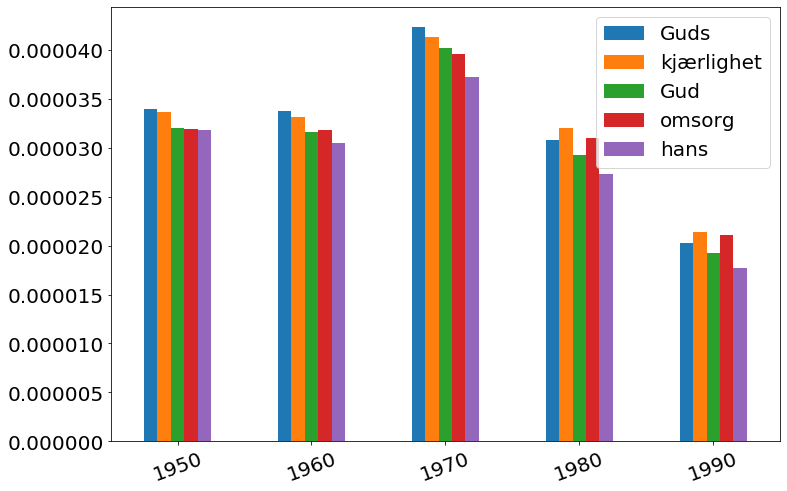

In [48]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(12, 8));

In [49]:
def freq_assoc_val(agg, pmi, col):
    vals = list(pmi.sort_values(by=pmi.columns[col], ascending=False).head(5).fillna(0).index)
    agg.loc[vals].sort_values(by= agg.columns[col], ascending=False).transpose().plot(kind="bar", rot=0, figsize=(12, 8))

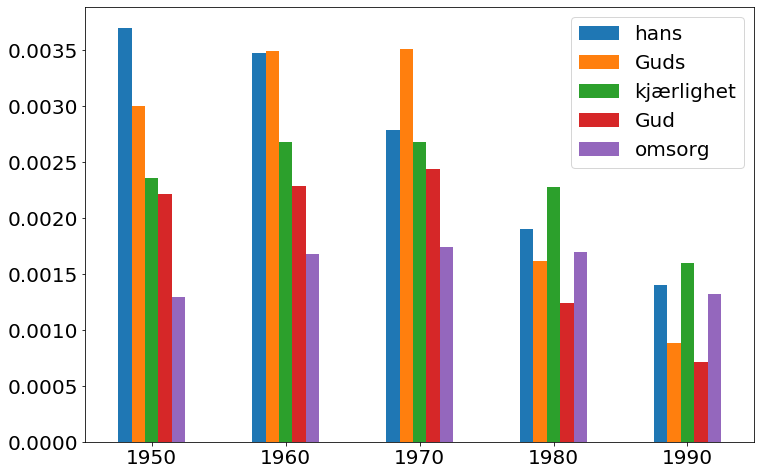

In [50]:
freq_assoc_val(agg, pmi, 0)

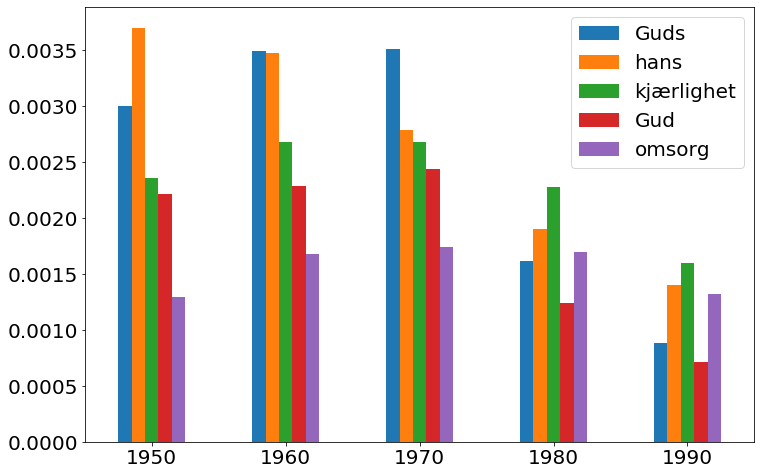

In [51]:
freq_assoc_val(agg, pmi, 1)

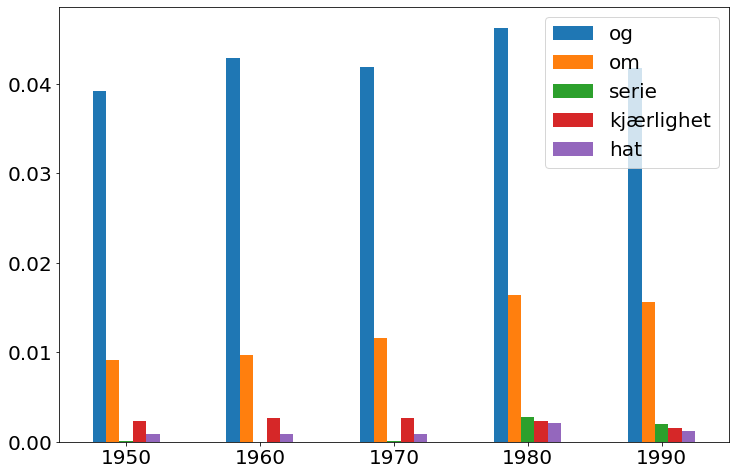

In [52]:
freq_assoc_val(agg, pmi, 3)

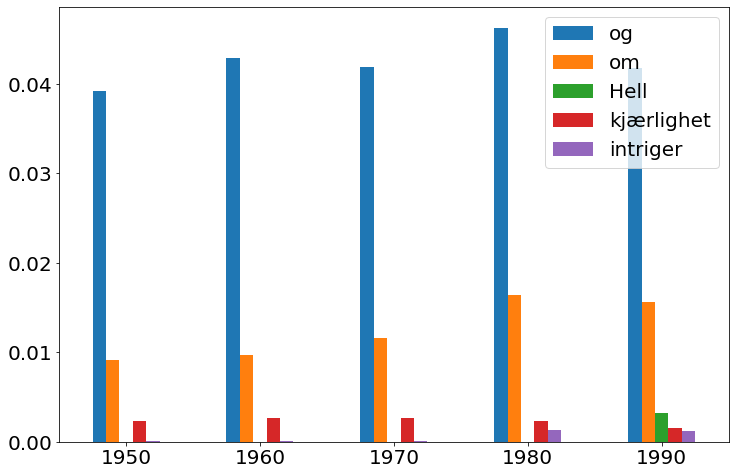

In [53]:
freq_assoc_val(agg, pmi, 4)

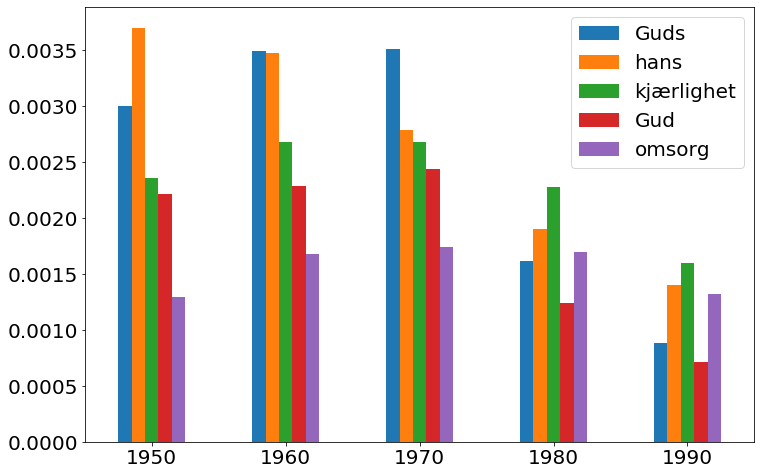

In [54]:
freq_assoc_val(agg, pmi, 1)

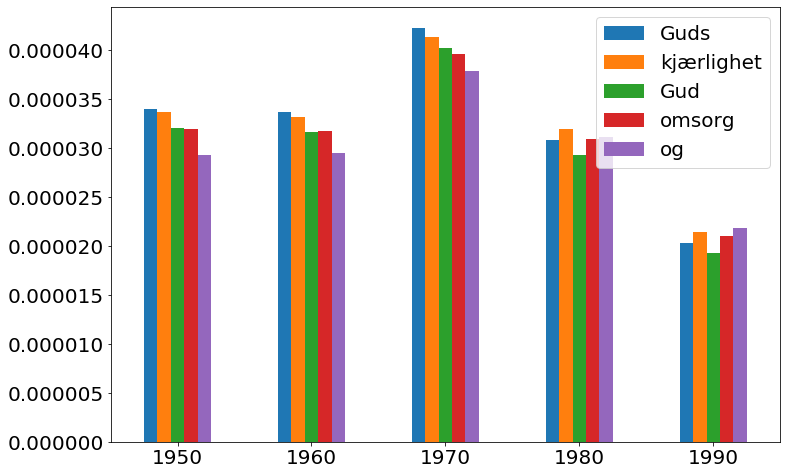

In [55]:
freq_assoc_val(pmi, pmi, 2)

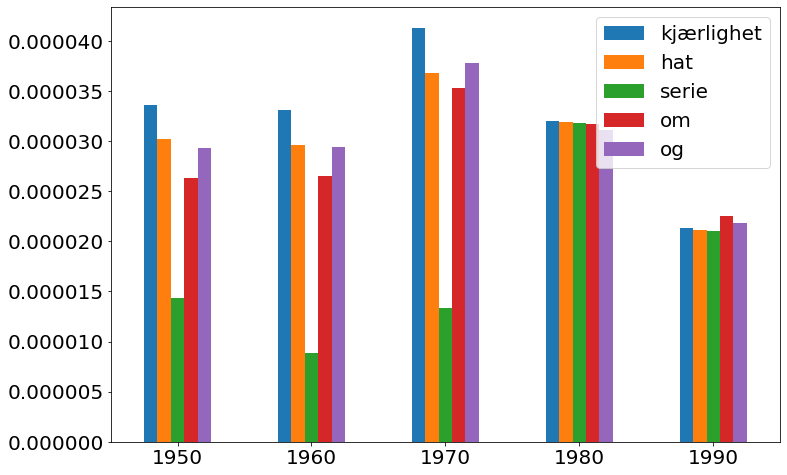

In [56]:
freq_assoc_val(pmi, pmi, 3)

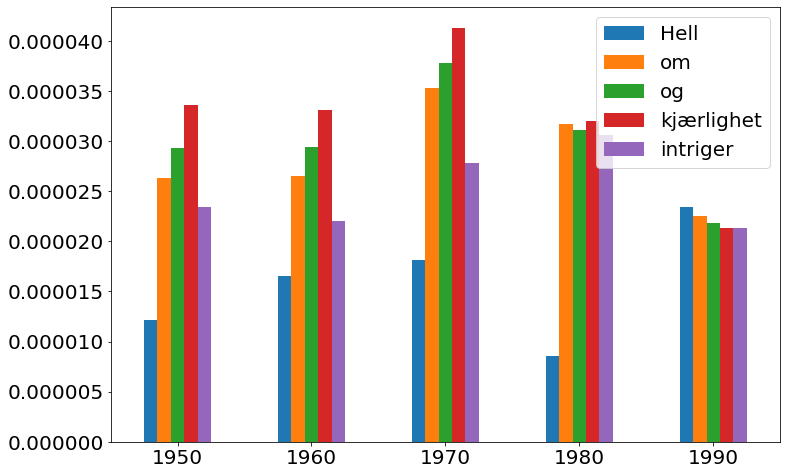

In [57]:
freq_assoc_val(pmi, pmi, 4)

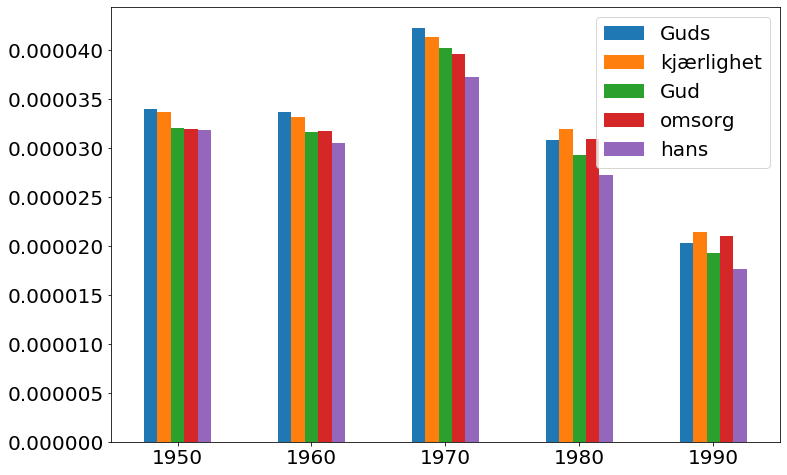

In [58]:
freq_assoc_val(pmi, pmi, 0)

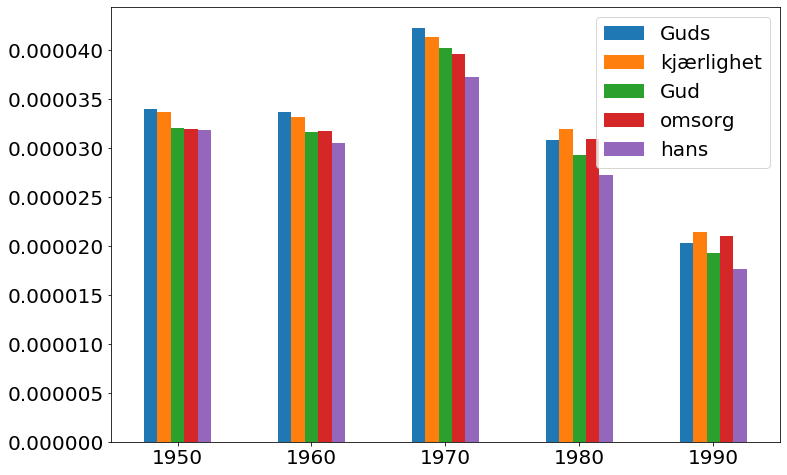

In [59]:
freq_assoc_val(pmi, pmi, 0)

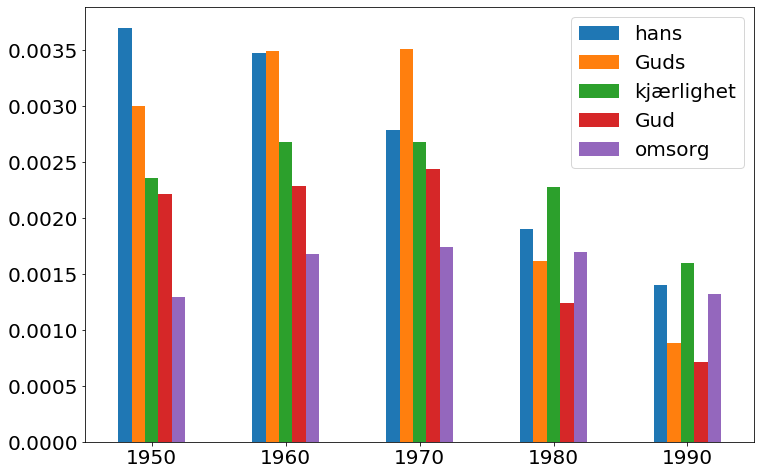

In [82]:
freq_assoc_val(agg, pmi, 0)

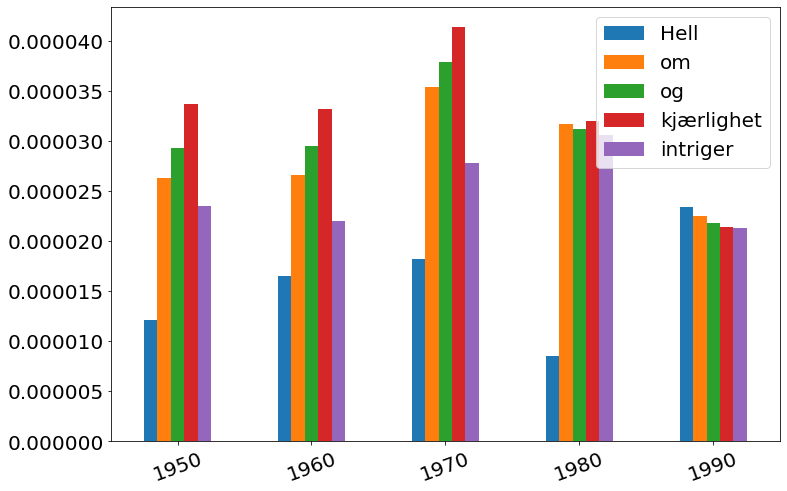

In [61]:
pmi.sort_values(by=pmi.columns[4], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(12, 8));

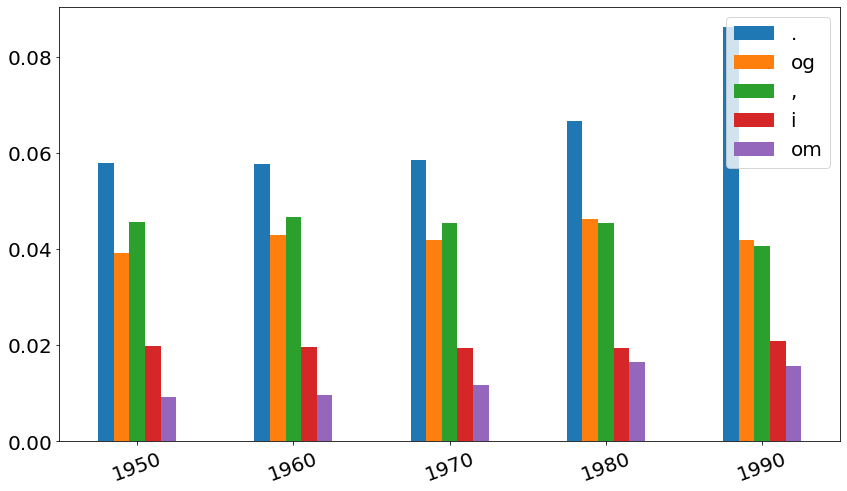

In [62]:
agg.sort_values(by=agg.columns[3], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(14, 8));

<br>
<br>
<br>
<br>

# De hundre ordene med høyest assosiasjon for perioden sortert på ordklasser

In [63]:
mdprint(pmi.sort_values(by=pmi.columns[2], ascending=False).head(100),-1)

## Benevnelser 
<span style='font-size:150%'>Guds, Gud, Jesus, Kristus, Kristi, Jesu, Geografi, Gammel, Kjærlighet, Hun, Faderen, ,, Kjærligheten, Og</span>

## subst
<span style='font-size:1.1em'>kjærlighet, omsorg, kjærligheten, om, godhet, vennskap, hun, mennesker, trygghet, forståelse, menneskene, ekteskap, medmennesker, lengsel, ømhet, respekt, ham, blikk, sex, sjalusi, omtanke, frihet, sannhet, følelser, troskap, dyp, lykke, hjerte, sorg, verden, rettferdighet, naturen, menneske, hengivenhet, barn, tilgivelse, ensomhet, kvinne, forelskelse, budskap</span>
## CLB
<span style='font-size:1.1em'>og</span>
## det
<span style='font-size:1.1em'>hans, hennes, deres, din, all</span>
## verb
<span style='font-size:1.1em'>sin, hat, tro, handler, varme, håp, ekte, liv, elsker, fred, elsket, elske, kristne, dem, livet, nåde, ruster, er, leve, skille, glede, sann, pinne, film, krig</span>
## pron
<span style='font-size:1.1em'>hverandre, oss, den, deg</span>
## adj
<span style='font-size:1.1em'>ulykkelig, ung, ulykkelige, evig, kristen, brennende</span>
## prep
<span style='font-size:1.1em'>henne, til</span>
## unknown
<span style='font-size:1.1em'>menneskers, trofasthet</span>
## sbu
<span style='font-size:1.1em'>som</span>


# Hvordan utvikler ordene seg?

In [64]:
barchart = lambda w, title='', df=pmi: df.loc[w].transpose().plot(kind='bar',title=title, rot=20, figsize=(12,6)) ;

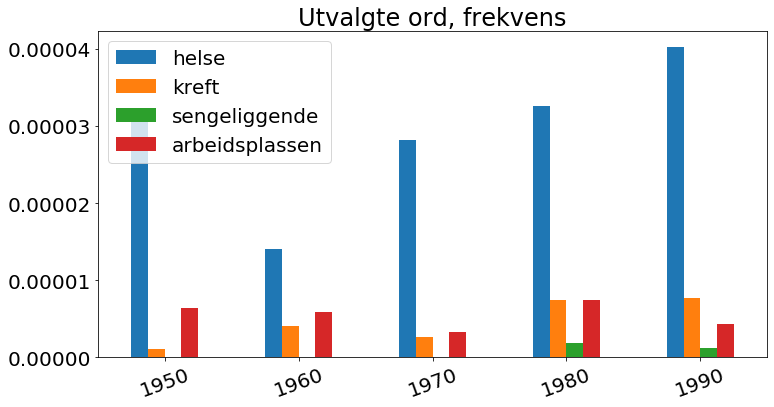

In [65]:
barchart(['helse','kreft',"sengeliggende", 'arbeidsplassen'], 'Utvalgte ord, frekvens', df=agg);

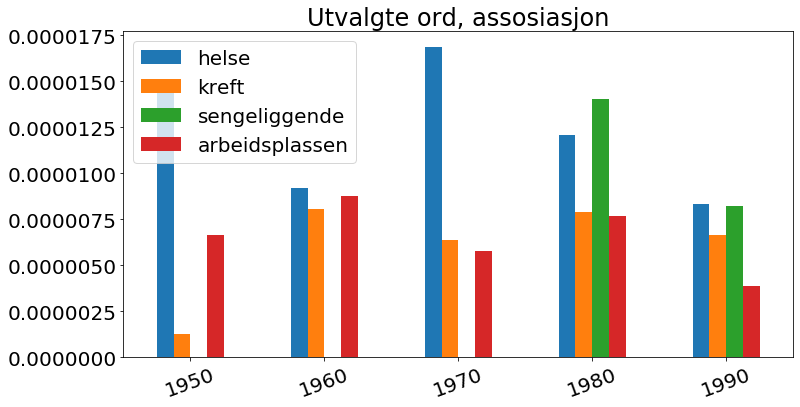

In [66]:
barchart(['helse','kreft',"sengeliggende", 'arbeidsplassen'], 'Utvalgte ord, assosiasjon');

<br>
<br>

# Sjekk ut vanlige ord

Bare for å se at de har lave verdier og er stabile gjennom kollokasjonen

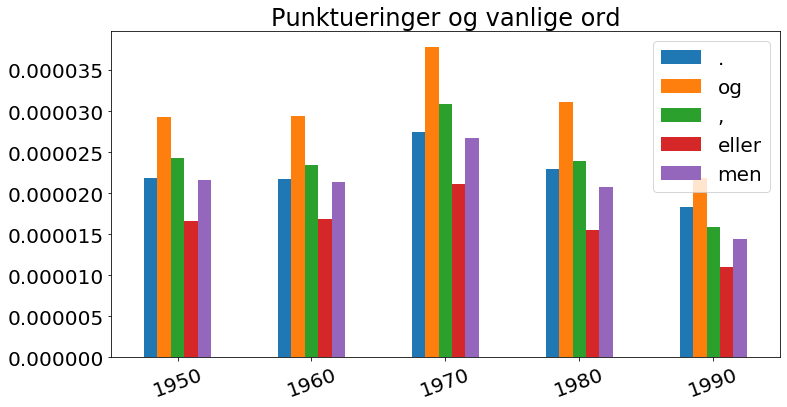

In [67]:
barchart(['.','og', ',','eller', 'men'], 'Punktueringer og vanlige ord', pmi);

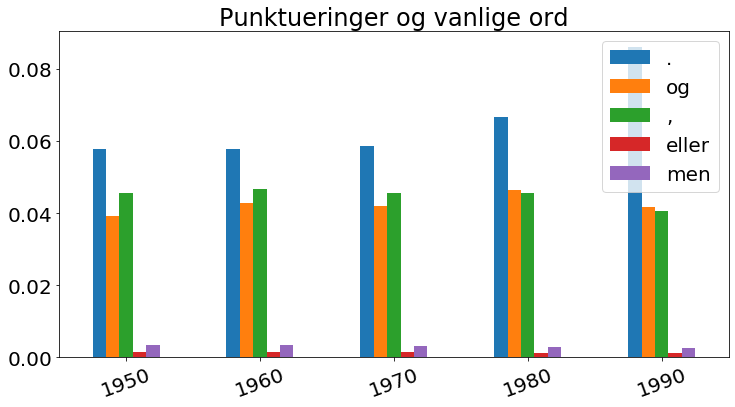

In [68]:
barchart(['.','og', ',','eller', 'men'], 'Punktueringer og vanlige ord', agg);

<br>
<br>

# De fremste blandt topoi 

Merk at på grunn av louvain-algoritmen kan topoiene endre seg litt fra kjøring til kjøring

In [69]:
commchart = lambda x, part =(1,6): barchart(comm[list(comm.keys())[x]][part[0]:part[1]], list(comm.keys())[x]);

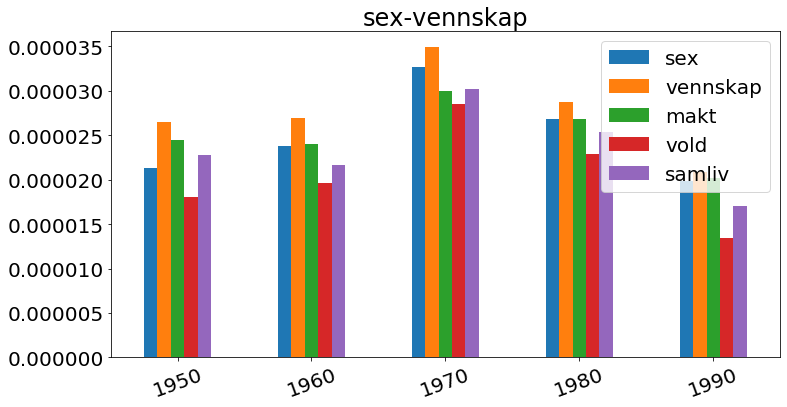

In [70]:
commchart(2, (0,5));

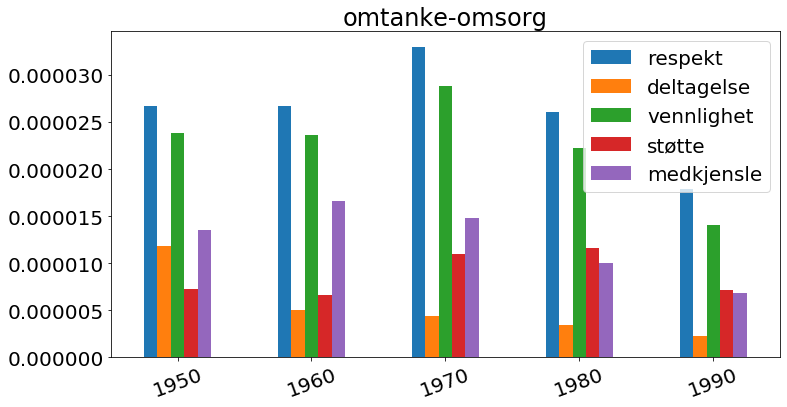

In [71]:
commchart(1, (3, 8))

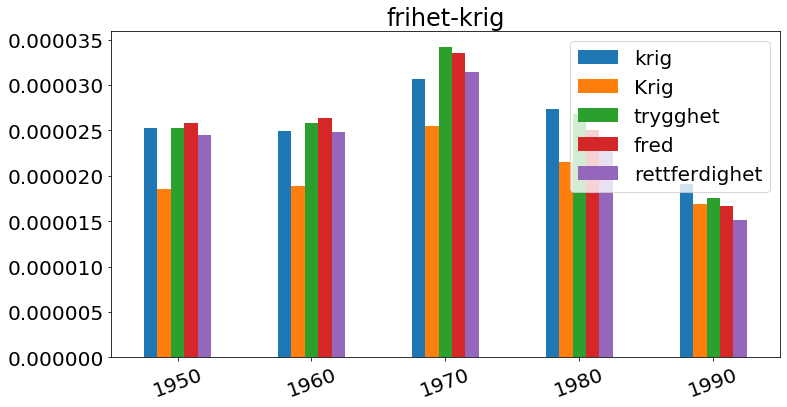

In [72]:
commchart(3)